# CS170A -- HW#1 -- assignment and solution form -- Matlab

Your name: Alfred Lucero

Your UID:  604251044

<b>Please upload only this notebook to CCLE by the deadline.</b>

<b>Policy for late submission of solutions:</b>  We will use Paul Eggert's Late
Policy: $N$ days late $\Leftrightarrow$ $2^N$ points deducted}
The number of days late is $N=0$
for the first 24 hrs, $N=1$ for the next 24 hrs, etc., and if you submit
an assignment $H$ hours late, $2^{\lfloor H/24\rfloor}$ points are
deducted.

## NOTE:  In this assignment we provide pseudocode to get you started.

In later assignments we will not do this.

# Problem 1:  SVD k-th order approximations (30 points)

If $A$ is a matrix that has SVD $A = U\,S\,V'$,
the <b>rank-k approximation of $A$</b>
keeping only the first $k$ columns of the SVD.

Specifically, given a $n \times p$ matrix $A$ with SVD $A = U\,S\,V'$,
then if $k \leq n$ and $k \leq p$, the rank-$k$ approximation of $A$ is
$$
A^{(k)} ~~=~~ U ~ S^{(k)} ~ V'
$$
where $S^{(k)}$ is the result of setting all diagonal elements to zero after the first $k$ entries
$(1 \leq k \leq p)$.
If $U^{(k)}$ and $V^{(k)}$ are like $U$ and $V$ but with all columns zero after the first $k$, then
$$
A^{(k)} ~~=~~ U ~ S^{(k)} ~ V' ~~=~~ U^{(k)} ~ S^{(k)} ~ V^{(k)'} .
$$


In class, we saw a demo of the attached Matlab script <tt>imagesvdgui.m</tt>
--- and the effectiveness of this approximation in retaining information about an image.

The goal of this problem is to implement this approximation
for black-and-white (grayscale) images.

In [1]:
load mandrill
Mandrill = ind2rgb(X, map);

A = mean(Mandrill,3);
size(A)

imwrite(A, 'GrayMandrill.bmp') % Write the Mandrill to a bitmap image file

% The matrix A now contains the Mandrill image (in grayscale)

ans =

   480   500


Display the bitmap image file using an HTML img tag: (shows black on my screen but if you check folder it shows up fine -> imshow works correctly)

<img src="GrayMandrill.bmp" width="200" height="200">

&lt;img src="GrayMandrill.bmp"&gt;

###  1.(a):  Plot Singular Values of the Rank-$k$ Approximation of an Image

As in HW0, construct a grayscale version of the Mandrill image,
and take one of the 3 color planes as a 500x480 matrix.
This is our `black and white' image $A$.
You are to analyze the rank-k approximation of the image.

Compute the SVD of $A$, and plot the singular values $\sigma_1$, $\sigma_2$, ...

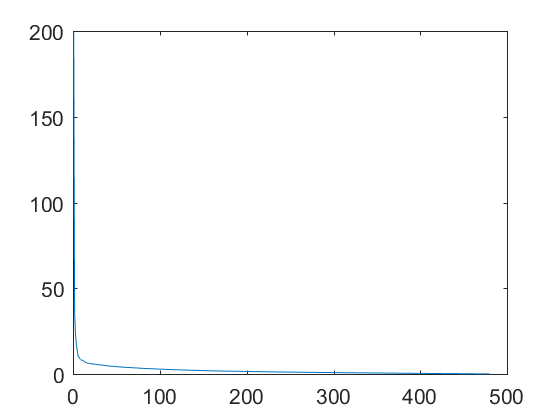

ans =

   1.7837e-12


In [2]:
[U S V] = svd(A);       % U, S, V are now the SVD of A

norm( A - U * S * V' )  %  A should match the product of U, S, V'

sigma = diag(S); % singular values
figure
plot(sigma)



###  1.(b):  Optimal Rank-$k$ Approximation of an Image

Find the value of $k$ that minimizes $\mid\mid{A \; - \; A^{(k)}}\mid\mid^2_{F} ~+~ k$.

In [3]:
[n p] = size(A)
maximum_possible_k = min(n,p)
minimumValue = 10000;
kMinimizer = 0;

for k=1:maximum_possible_k
   [U2, S2, V2] = svds(A, k);
   A2 = U2 * S2 * V2'; % rank-k approximation of A
   squaredFrobenius = norm( A - A2, 'fro' )^2;  % squared Frobenius norm
   errorApproximation = norm(A - A2);
   if (squaredFrobenius + k < minimumValue)
      minimumValue = squaredFrobenius + k;
      kMinimizer = k;
   end
   sprintf('%d : SquaredFrobenius = %f; errorApprox = %f', k, squaredFrobenius, errorApproximation)
end
sprintf('k that minimizes ||A - A^k||F^2 + k is %d', kMinimizer)
% Value of K is 265

n =

   480


p =

   500


maximum_possible_k =

   480


ans =

1 : SquaredFrobenius = 5250.459995; errorApprox = 36.446883


ans =

2 : SquaredFrobenius = 3922.084714; errorApprox = 23.417040


ans =

3 : SquaredFrobenius = 3373.726963; errorApprox = 17.258826


ans =

4 : SquaredFrobenius = 3075.859886; errorApprox = 13.663605


ans =

5 : SquaredFrobenius = 2889.165785; errorApprox = 10.536551


ans =

6 : SquaredFrobenius = 2778.146872; errorApprox = 9.895573


ans =

7 : SquaredFrobenius = 2680.224502; errorApprox = 8.828801


ans =

8 : SquaredFrobenius = 2602.276775; errorApprox = 8.765763


ans =

9 : SquaredFrobenius = 2525.438171; errorApprox = 8.078863


ans =

10 : SquaredFrobenius = 2460.170149; errorApprox = 7.959976


ans =

11 : SquaredFrobenius = 2396.808923; errorApprox = 7.852124


ans =

12 : SquaredFrobenius = 2335.153065; errorApprox = 7.155546


ans =

13 : SquaredFrobenius = 2283.951232; errorApprox = 6.927385


ans =

14 : SquaredFrobenius = 2235.962564; erro

###  1.(c):  The Rank-$k$ Approximation is a Good Approximation

In the chapter on the SVD, the course reader presents a derivation for $A \, - \, A^{(k)}$:
$$\begin{eqnarray*}
A \; - \; A^{(k)}
 & = &
U \; S \; V' ~ - ~ U^{(k)} ~ S^{(k)} ~ V^{(k)'}  \\
 & = &
U \; S \; V' ~ - ~ U \; S^{(k)} \; V' \\
 & = &
U \; (S ~ - ~ S^{(k)}) \; V ' \\
\end{eqnarray*}$$

Prove the following:
$$ \mid\mid{A \; - \; A^{(k)}}\mid\mid^2_{F} ~=~ \sum_{i>k} \sigma_i^2 . $$


#### Proof  (Enter your Proof here)
Because
$$\begin{eqnarray*}
A \; - \; A^{(k)}
 & = &
U \; S \; V' ~ - ~ U^{(k)} ~ S^{(k)} ~ V^{(k)'}  \\
 & = &
U \; S \; V' ~ - ~ U \; S^{(k)} \; V' \\
 & = &
U \; (S ~ - ~ S^{(k)}) \; V ' \\
\end{eqnarray*}$$


As a result, 
$$\begin{eqnarray*}
\mid\mid{A \; - \; A^{(k)}}\mid\mid^2_{F} & = & \mid\mid{U \; S \; V' \; - \; U \; S^{(k)} \; V'}\mid\mid^2_{F} \\
& = & \mid\mid{U \; (S ~ - ~ S^{(k)}) \; V '}\mid\mid^2_{F}, in \; \sigma_i \; for \; S, \; there \; are \; n \; singular \; values; \; for \; S^{(k)} \; after \; the \; first \; k \; entries, \; d_i \; is \; zero \\
& = & \sum^{n}_{i=1} (\sigma_i - d_i)^2 \; ,but \; d_i \; = \; \sigma_i \; when \; i \; = 1,2,...,k \\
& = & \sum^{k}_{i=1} (\sigma_i - d_i)^2 + \sum^{n}_{i=k+1} (\sigma_i - d_i)^2 \\
& = & 0 \; (since \; d_i \; and \; \sigma_i \; cancel \; out \; when \; i \; <= \; k) \; + \; \sum^{n}_{i=k+1} (\sigma_i - 0)^2 \; (d_i \; is \; zeroed \; out \; after \; first \; k \; entries) \\
& = & \sum_{i>k} \sigma_i^2
\end{eqnarray*}$$


Therefore, 
$$ \mid\mid{A \; - \; A^{(k)}}\mid\mid^2_{F} ~=~ \sum_{i>k} \sigma_i^2 . $$

# Problem 2:  Baseball Visualization (40 points)

For this dataset you are given a matrix of statistics for Baseball players.
You are to perform two kinds of analysis on this matrix.

### Read in the Baseball Statistics

Statistics of top players after the last regular season game,
obtained from MLB.com, October 2016.

In [2]:
%%% Stats = csvread('Baseball_Players_Stats_2016.csv', 1, 0);  # skip the header (= row 0)
%%% Names = csvread('Baseball_Players_Names_2016.csv', 1, 0);

Baseball_Players_2016   %% execute Baseball_Players_2016.m  to load in the data needed here

 added to session magics.



In [85]:
StatNames{1:3}

size(StatNames)

StatNames{:}

ans =

Rank


ans =

G


ans =

AB


ans =

     1    17


ans =

Rank


ans =

G


ans =

AB


ans =

R


ans =

H


ans =

2B


ans =

3B


ans =

HR


ans =

RBI


ans =

BB


ans =

SO


ans =

SB


ans =

CS


ans =

AVG


ans =

OBP


ans =

SLG


ans =

OPS


In [4]:
size(Stats)
Stats(1:3, :)

ans =

   146    17


ans =

  Columns 1 through 16

    1.0000  146.0000  552.0000  104.0000  192.0000   32.0000    8.0000   11.0000   66.0000   66.0000   80.0000   11.0000    7.0000    0.3480    0.4160    0.4950
    2.0000  142.0000  531.0000   88.0000  184.0000   47.0000    5.0000   25.0000  104.0000   35.0000   57.0000    5.0000    3.0000    0.3470    0.3900    0.5950
    3.0000  161.0000  640.0000  108.0000  216.0000   42.0000    5.0000   24.0000   96.0000   60.0000   70.0000   30.0000   10.0000    0.3380    0.3960    0.5310

  Column 17

    0.9110
    0.9850
    0.9280


In [5]:
size(PlayerNames)
PlayerNames{1:3}

ans =

   146     1


ans =

  LeMahieu D


ans =

  Murphy D


ans =

  Altuve J


### Compute a "scaled" version of the Stats matrix

We scale each column of values ${\bf x}$ in Stats
to be  ${\bf z} = ({\bf x}-\mu)/\sigma$ in ScaledStats,
where $\mu$ is the mean of the ${\bf x}$ values, and $\sigma$ is their standard deviation.

In Octave/Matlab, the function <tt>mean()</tt> computes column means,
and <tt>std()</tt> computes standard deviations.
The function <tt>zscore()</tt> computes both,
and uses them to "scale" each column in this way.

This scaling is also called __normalization__ and __standardization__.
The __z-scores__ ${\bf z} = ({\bf x}-\mu)/\sigma$ are also called
the standardized or normalized values for ${\bf x}$.

In [37]:
ScaledStats = zscore(Stats)   %  z  =  (x-mu)/sigma

mean(ScaledStats);  %  the means of each column after normalization should be 0
std(ScaledStats);  %  the standard deviations of each column after normalization should be 1

ScaledStats =

  Columns 1 through 16

   -1.7143   -0.2110    0.0174    1.3893    1.7112    0.3406    2.0523   -1.0985   -0.5198    0.5899   -1.0806    0.2160    1.1605    2.7713    2.3418    0.6512
   -1.6907   -0.5986   -0.3800    0.4858    1.3779    2.4124    0.8175    0.2866    1.2526   -0.8893   -1.7729   -0.3866   -0.1134    2.7344    1.5359    2.3471
   -1.6670    1.2423    1.6827    1.6152    2.7111    1.7218    0.8175    0.1877    0.8795    0.3036   -1.3816    2.1244    2.1160    2.4017    1.7219    1.2617
   -1.6434    0.9517    0.0931    1.2199    1.2530    0.6168   -0.4172    0.6824    0.9261    2.5940    0.1235   -0.0853   -0.7504    1.9582    2.8998    1.5840
   -1.6197   -0.5017    0.5094    1.7846    1.5029    0.7549    0.8175    0.6824    0.2265   -0.5076   -0.4183    0.8187    1.7975    1.8843    1.2569    1.6179
   -1.5961    0.4672    1.6259    1.2764    2.1695    1.5837    1.6407   -0.2080   -0.6131   -0.6984   -0.4484    2.4257    2.1160    1.6995    0.8539    0.

### 2 (a):  Random Projections
 
A fundamental problem in data science is that it is impossible to visualize a dataset that has many features.  Given an $n \times p$ dataset (matrix) $A$ in which the number of features $p$ is large, there is no obvious way to plot the data.

_Dimensionality reduction_ algorithms have been developed that attempt to find datasets that have lower values of $p$ but approximate $A$ in some way.  Although there are sophisticated algorithms, a competitive approach is to compute a ___random projection___ of $A$ into a few dimensions.  When the projection is into 2 or 3 dimensions, the result can be visualized.

A ___random $k$-D projection___ of a $n \times p$ dataset (matrix) $A$ is the result $(A \, P)$ of multiplying $A$ on the right by a $p \times k$ matrix $P$ of random values.

The result is a $n \times k$ matrix, assigning each row in $A$ a new pair of values $(x,y)$, and these can be interpreted as positions in a 2D plot.

In [ ]:
% plotting 2D values
Iris = csvread('iris.csv', 1,0);  % skip over the header line
A = Iris(:, 1:4);  % just the measurement columns
[n p] = size(A);
P = rand(p,2);
disp('random projection weights:')
disp(P)
XY = A * P;
plot(XY(:,1), XY(:,2), 'b.')
title('random projection of the iris data')
species = {'  s', '  v', '  V'}
text(XY(:,1), XY(:,2), species(Iris(:,5)), 'FontSize', 10 )

___Problem:___ write a function <tt>random_projection(A,k)</tt> that, given an input matrix $A$ of size $n \times p$ and an integer $k>0$, produces a random $k$-D projection.

Please use uniform random values in the matrix $P$.

Then:  plot the result of 3 random 2D projections of the data. 

In each plot, identify the ___greatest outlier___ -- the player with $(x,y)$ values that have the largest total $x+y$.  Print the row in the dataset whose projection is this outlier.

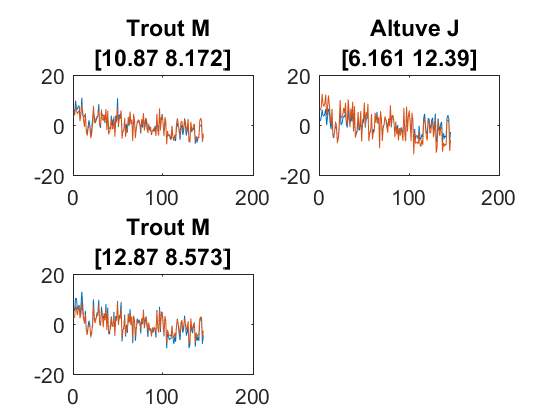

random_projection =

  function_handle with value:

    @(A,k)A*rand(size(A,2),k)


n =

   146


p =

    17


outlier_row_index =

    10


outlier_row =

   10.8696    8.1724


greatest_outlier_player =

  cell

    '  Trout M'


outlier_row_index =

     3


outlier_row =

    6.1609   12.3916


greatest_outlier_player =

  cell

    '  Altuve J'


outlier_row_index =

    10


outlier_row =

   12.8685    8.5729


greatest_outlier_player =

  cell

    '  Trout M'


In [68]:

random_projection = @(A,k) A * rand(size(A,2), k) % A (n x p) * P (p x k)
[n p] = size(ScaledStats)

for i = 1:3
   XY = random_projection( ScaledStats, 2 ); % produces 3 random 2D projections of data
   [n k] = size(XY);
   subplot(2,2,i)
   plot(XY)
   % text( XY(:,1), PlayerNames, 'FontSize', 10 )
   %text( XY(:,2), PlayerRanks, 'FontSize', 10 )
   XplusY = sum(XY,2);
   greatest_outlier = max(XplusY);
   outlier_row_index = find(sum(XY,2) == greatest_outlier)
   outlier_row = XY(outlier_row_index, :)
   greatest_outlier_player = PlayerNames(outlier_row_index, 1)
   title([greatest_outlier_player, mat2str(outlier_row,4)]); % greatest_outlier_player \n [greatest_outlier_row]

end

### 2 (b): Latent Semantic Analysis

The course reader describes __Latent Semantic Indexing__
for a matrix of values measuring association between X terms vs. Y terms.

The classic example is a "term/document matrix" for Keywords vs. Books, shown below.
The code shown produces an LSI plot for the data.

__Your job is to produce an analogous LSI plot for the table of Baseball players.__

Components are computed as in:
  Berry, M. W., Dumais, S. T., and O'Brien, G. W. (1995).
  "Using linear algebra for intelligent information retrieval."
  SIAM Review, 37(4), 1995, 573-595.

Some LSI references:
<a target="_blank"
href="http://lsi.research.telcordia.com/lsi/LSIpapers.html">lsi.research.telcordia.com/lsi/LSIpapers.html</a>

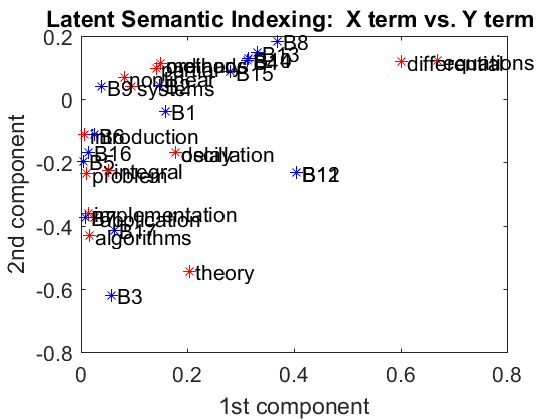

Xfactor =

    0.0159   -0.4317
    0.0266   -0.3756
    0.1785   -0.1692
    0.6014    0.1187
    0.6691    0.1209
    0.0148   -0.3603
    0.0520   -0.2248
    0.0066   -0.1120
    0.1503    0.1127
    0.0813    0.0672
    0.1503    0.1127
    0.1785   -0.1692
    0.1415    0.0974
    0.0105   -0.2363
    0.0952    0.0399
    0.2051   -0.5448


Yfactor =

    0.1591   -0.0377
    0.1477    0.0438
    0.0579   -0.6208
    0.3116    0.1222
    0.0050   -0.1971
    0.0248   -0.1118
    0.0091   -0.3728
    0.3677    0.1830
    0.0390    0.0388
    0.3135    0.1277
    0.4044   -0.2334
    0.4044   -0.2334
    0.3295    0.1466
    0.3135    0.1277
    0.2804    0.0869
    0.0138   -0.1672
    0.0626   -0.4152


In [11]:
% X:  Keywords

nX = 16;
Xtext = {
        'algorithms',
        'application',
        'delay',
        'differential',
        'equations',
        'implementation',
        'integral',
        'introduction',
        'methods',
        'nonlinear',
        'ordinary',
        'oscillation',
        'partial',
        'problem',
        'systems',
        'theory'
        };

% Y:  Books

nY = 17;

% Book: 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17   # Keyword:
%--------------------------------------------------------------------------
coOccurrence =  [
        0  0  1  0  1  0  1  0  0  0  0  0  0  0  0  0  0;  % algorithms
        0  0  1  0  0  0  0  0  0  0  0  0  0  0  0  0  1;  % application
        0  0  0  0  0  0  0  0  0  0  1  1  0  0  0  0  0;  % delay
        0  0  0  1  0  0  0  1  0  1  1  1  1  1  1  0  0;  % differential
        1  1  0  1  0  0  0  1  0  1  1  1  1  1  1  0  0;  % equations
        0  0  1  0  0  0  1  0  0  0  0  0  0  0  0  0  0;  % implementation
        1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  1  1;  % integral
        0  0  0  0  1  1  0  0  0  0  0  0  0  0  0  0  0;  % introduction
        0  0  0  0  0  0  0  1  0  0  0  0  0  1  0  0  0;  % methods
        0  0  0  0  0  0  0  0  1  0  0  0  1  0  0  0  0;  % nonlinear
        0  0  0  0  0  0  0  1  0  1  0  0  0  0  0  0  0;  % ordinary
        0  0  0  0  0  0  0  0  0  0  1  1  0  0  0  0  0;  % oscillation
        0  0  0  1  0  0  0  0  0  0  0  0  1  0  0  0  0;  % partial
        0  0  0  0  0  1  1  0  0  0  0  0  0  0  0  1  0;  % problem
        0  0  0  0  0  1  0  1  1  0  0  0  0  0  0  0  0;  % systems
        0  0  1  0  0  0  0  0  0  0  1  1  0  0  0  0  1;  % theory
];

[U,S,V] = svd(coOccurrence);

%  We can look at a plot of the singular values (diagonal of S):

plot( diag(S), 'b' )

Xfactor = U(:,1:2)
Yfactor = V(:,1:2)

% plot the 2D projection of the data

text_offset = 0.01;
plot( Xfactor(:,1), Xfactor(:,2), 'r*' )
hold on
plot( Yfactor(:,1), Yfactor(:,2), 'b*' )

for i = (1:nX)
     text( Xfactor(i,1)+text_offset, Xfactor(i,2), Xtext(i))
end

for i = (1:nY)
     text( Yfactor(i,1)+text_offset, Yfactor(i,2), sprintf('B%d',i))
end

title( 'Latent Semantic Indexing:  X term vs. Y term ' )
xlabel( '1st component' )
ylabel( '2nd component' )

zoom on
hold off

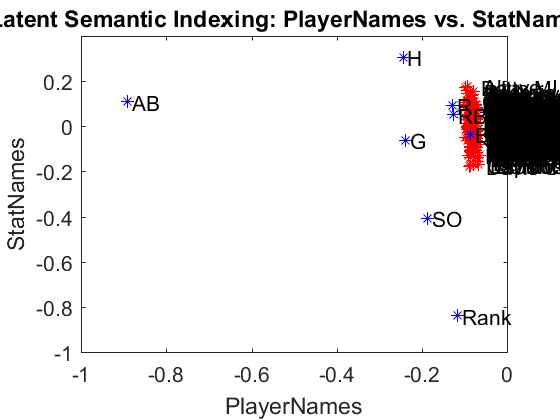

In [90]:
% X: PlayerNames
nX = 146;
Xtext = PlayerNames(:, 1);

% Y:  StatNames

nY = 17;

% StatNames: RANK G  AB  R  H  2B  3B  HR  RBI  BB SO SB CS AVG OBP SLG OPS   # PlayerNames:
%--------------------------------------------------------------------------
coOccurrence = Stats(:,:);

[U,S,V] = svd(coOccurrence);

%  We can look at a plot of the singular values (diagonal of S):

plot( diag(S), 'b' )

Xfactor = U(:,1:2);
Yfactor = V(:,1:2);

% plot the 2D projection of the data

text_offset = 0.01;
plot( Xfactor(:,1), Xfactor(:,2), 'r*' )
hold on
plot( Yfactor(:,1), Yfactor(:,2), 'b*' )

for i = (1:nX)
     text( Xfactor(i,1)+text_offset, Xfactor(i,2), Xtext(i))
end

for i = (1:nY)
     text( Yfactor(i,1)+text_offset, Yfactor(i,2), sprintf('%s', StatNames{i}))
end

title( 'Latent Semantic Indexing: PlayerNames vs. StatNames ' )
xlabel( 'PlayerNames' )
ylabel( 'StatNames' )

zoom on
hold off
%size(Stats);
%size(PlayerNames);


# Problem 3: Global Warming again  (30 points)

In HW0, you plotted the average (non-missing-value) temperature anomaly over the entire grid,
for every year from 1916 to 2015.

In this problem we want you to fit linear models through the data.

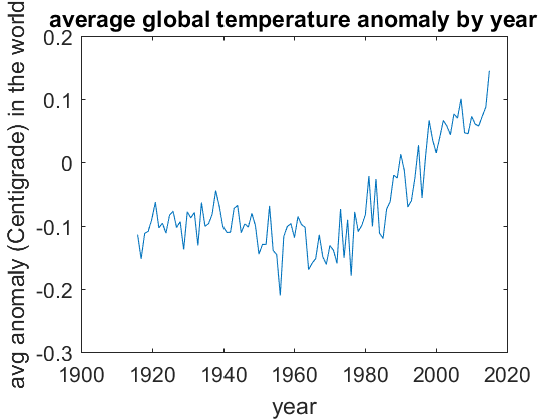

maximum_anomaly_value =

   19.9400


minimum_anomaly_value =

  -24.2600


total_number_of_grid_squares =

       31104


N =

       31104


In [92]:
% set up everything as in HW#0:

GHCN = csvread('ghcn.csv');

%   The data was artificially shifted to [0, 4500];
%     its range should be [-2500, +2000]/100 = [-25,+20], in degrees Centigrade.
%     Since our focus here is on warming, we ignore temperatures below -5.
%   We omit the year and month in columns 1:2 before scaling:

GHCN_in_centigrade  = (GHCN(:,3:74) - 2500) / 100;

temperature_anomaly = reshape( GHCN_in_centigrade, [36, 12, 137, 72] );   % convert to a 4D matrix, so we can use slices

missing_values = (temperature_anomaly == -25);
% Get the non_missing_values of the temperature anomalies
non_missing_values = ~(missing_values);
temperature_anomaly = temperature_anomaly .* non_missing_values;
number_of_missing_values = sum(sum(sum(sum( missing_values ))));

maximum_anomaly_value = max(max(max(max( temperature_anomaly ))))
minimum_anomaly_value = min(min(min(min( temperature_anomaly .*  (~ missing_values) ))))  %  '~' is 'not' in MATLAB

my_years = 1916:2015;
global_latitude = 1:36;
global_longitude = 1:72;
% Change to global so 1:36 for latitude and 1:72 for longitude
my_slice = temperature_anomaly( global_latitude, :, my_years - 1880 + 1, global_longitude );

total_number_of_grid_squares = length(global_latitude) * length(global_longitude) * 12
N = total_number_of_grid_squares

average_global_anomaly_by_year = reshape( sum(sum(sum( my_slice, 4),2),1), [length(my_years) 1] ) / N;

plot( my_years, average_global_anomaly_by_year )
xlabel('year')
ylabel('avg anomaly (Centigrade) in the world')
title('average global temperature anomaly by year')


### (a) Global Average Temperature Anomaly:  Linear Model (Least Squares)

___Problem:___ fit a line through the data, using Least Squares.

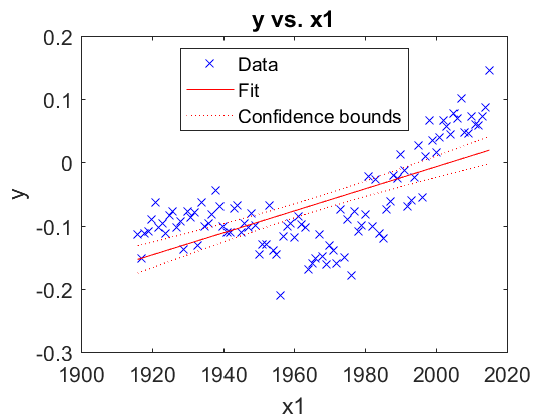

linear_model = 


Linear regression model:
    y ~ 1 + x1

Estimated Coefficients:
                   Estimate         SE         tStat       pValue  
                   _________    __________    _______    __________

    (Intercept)      -3.5005        0.3741    -9.3573    3.0058e-15
    x1             0.0017469    0.00019031      9.179    7.3227e-15


Number of observations: 100, Error degrees of freedom: 98
Root Mean Squared Error: 0.0549
R-squared: 0.462,  Adjusted R-Squared 0.457
F-statistic vs. constant model: 84.3, p-value = 7.32e-15


In [97]:
average_global_anomaly_by_year = reshape( sum(sum(sum( my_slice, 4),2),1), [length(my_years) 1] ) / N;

linear_model = fitlm(my_years, average_global_anomaly_by_year) % create linear regression model
plot(linear_model)
% inv(X'*X)*X'*y, pinv(X) * y, polyfit, lmfit, plot fitting lines in both 

### (b) Global Average Temperature Anomaly:  Piecewise Linear Model (Least Squares)

___Problem:___ fit a 2-segment piecewise linear model through the data, using Least Squares.

Specifically, find a pair of least squares models, one from 1916 up to year Y, and one from year Y+1 to 2015, such that the SSE (sum of squared errors) is minimized.


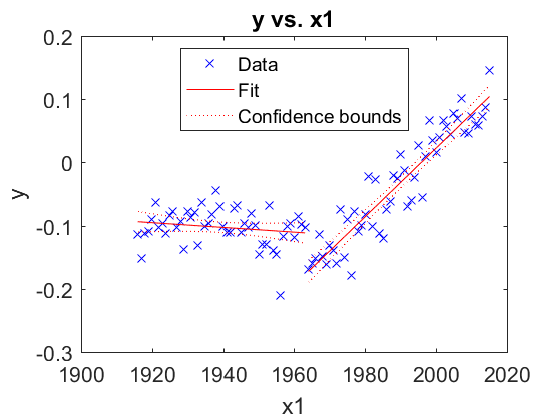

[Warning: Regression design matrix is rank deficient to within machine precision.] 
[> In classreg.regr.CompactTermsRegression/checkDesignRank (line 35)
  In LinearModel.fit (line 1215)
  In fitlm (line 117)
  In pymat_eval (line 31)
  In matlabserver (line 24)] 
[Warning: Regression design matrix is rank deficient to within machine precision.] 
[> In classreg.regr.CompactTermsRegression/checkDesignRank (line 35)
  In LinearModel.fit (line 1215)
  In fitlm (line 117)
  In pymat_eval (line 31)
  In matlabserver (line 24)] 

minimum_SSE =

    0.0870


minimum_linear_model_up_to_Y = 


Linear regression model:
    y ~ 1 + x1

Estimated Coefficients:
                    Estimate          SE         tStat     pValue 
                   ___________    __________    _______    _______

    (Intercept)        0.62518       0.57422     1.0888    0.28193
    x1             -0.00037529    0.00029606    -1.2676    0.21132


Number of observations: 48, Error degrees of freedom: 46
Root Mea

In [127]:
minimum_SSE = 10000;
minimum_linear_model_up_to_Y = 0;
minimum_linear_model_after_Y = 0;
% use hold on to allow multiple plots

for Y = 1916:2014
    % Calculate average global anomaly from 1916 to Y
    up_to_Y_years = 1916:Y;
    up_to_Y_slice = temperature_anomaly( global_latitude, :, up_to_Y_years - 1880 + 1, global_longitude );
    average_global_anomaly_by_year_up_to_Y = reshape( sum(sum(sum( up_to_Y_slice, 4),2),1), [length(up_to_Y_years) 1] ) / N;
    
    % Calculate average global anomaly from Y+1 to 2015
    after_Y_years = Y+1:2015;
    after_Y_slice = temperature_anomaly( global_latitude, :, after_Y_years - 1880 + 1, global_longitude );
    average_global_anomaly_by_year_after_Y = reshape( sum(sum(sum( after_Y_slice, 4),2),1), [length(after_Y_years) 1] ) / N;
    
    % Calculate linear regression models for both time ranges
    linear_model_up_to_Y = fitlm(up_to_Y_years, average_global_anomaly_by_year_up_to_Y); % 1916 up to Y
    linear_model_after_Y = fitlm(after_Y_years, average_global_anomaly_by_year_after_Y); % Y+1 to 2015
    total_SSE = linear_model_up_to_Y.SSE + linear_model_after_Y.SSE; % SSE_up_to_Y + SSE_after_Y
    
    % Keep track of the minimum SSE between pair of date ranges
    if (total_SSE < minimum_SSE)
        minimum_SSE = total_SSE;
        minimum_linear_model_up_to_Y = linear_model_up_to_Y;
        minimum_linear_model_after_Y = linear_model_after_Y;
    end
end

minimum_SSE
minimum_linear_model_up_to_Y
minimum_linear_model_after_Y

% Plot the minimum SSE for pair of date ranges for average global anomaly
plot(minimum_linear_model_up_to_Y)
hold on
plot(minimum_linear_model_after_Y)
hold off
